# CAT DOG CLASSIFIER

In [1]:
import os, shutil

In [2]:
import tensorflow

### Step1: Create directories for trainig and validation and testing

In [12]:
original_datset_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/kaggle_original_data/train"

In [17]:
shutil.rmtree(base_dir)

In [18]:
base_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small"
os.mkdir(base_dir)

In [19]:
train_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/train"
os.mkdir(train_dir)

In [20]:
validation_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/validation"
os.mkdir(validation_dir)

In [21]:
test_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/test"
os.mkdir(test_dir)

In [22]:
train_cats_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/train/cats"
os.mkdir(train_cats_dir)

In [23]:
validation_cats_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/validation/cats"
os.mkdir(validation_cats_dir)
test_cats_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/test/cats"
os.mkdir(test_cats_dir)

In [24]:
train_dogs_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/train/dogs"
os.mkdir(train_dogs_dir)
validation_dogs_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/validation/dogs"
os.mkdir(validation_dogs_dir)
test_dogs_dir="C:/Users/davidpratap/Desktop/ML_OPS/Day 3&4/cats_dogs_small/test/dogs"
os.mkdir(test_dogs_dir)

In [25]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_datset_dir, fname)
    dst=os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_datset_dir, fname)
    dst=os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src=os.path.join(original_datset_dir, fname)
    dst=os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src=os.path.join(original_datset_dir, fname)
    dst=os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [28]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src=os.path.join(original_datset_dir, fname)
    dst=os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src=os.path.join(original_datset_dir, fname)
    dst=os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
print("No.of training cat images =",len(os.listdir(train_cats_dir)))
print("No.of validation cat images =",len(os.listdir(validation_cats_dir)))
print("No.of testing cat images =",len(os.listdir(test_cats_dir)))
print("No.of training dog images =",len(os.listdir(train_dogs_dir)))
print("No.of validation dog images =",len(os.listdir(validation_dogs_dir)))
print("No.of testing dog images =",len(os.listdir(test_dogs_dir)))

No.of training cat images = 1000
No.of validation cat images = 500
No.of testing cat images = 500
No.of training dog images = 1000
No.of validation dog images = 500
No.of testing dog images = 500


### Step2: Instantiate a CNN Model

In [32]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [46]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0002),
             metrics=['acc'])

### Preprocess the training and validation images

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [48]:
history=model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 58s 572ms/step - loss: 0.6916 - acc: 0.5205 - val_loss: 0.6843 - val_acc: 0.6030
Epoch 2/30
100/100 [==============================] - 53s 531ms/step - loss: 0.6643 - acc: 0.6015 - val_loss: 0.6598 - val_acc: 0.5640
Epoch 3/30
100/100 [==============================] - 54s 537ms/step - loss: 0.6138 - acc: 0.6660 - val_loss: 0.6116 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 54s 544ms/step - loss: 0.5714 - acc: 0.7070 - val_loss: 0.6439 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 55s 553ms/step - loss: 0.5474 - acc: 0.7215 - val_loss: 0.5926 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 69s 688ms/step - loss: 0.5108 - acc: 0.7440 - val_loss: 0.5993 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 60s 597ms/step - loss: 0.4755 - acc: 0.7770 - val_loss: 0.5504 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 5

In [55]:
# evaluate the metrics 
def plot_metrics(history):
    import matplotlib.pyplot as plt
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    
    epochs=range(1, len(acc)+1)
    plt.plot(epochs, acc,'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc,'b', label='Validation Accuaracy')
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo',label='Training Loss')
    plt.plot(epochs, val_loss,'b', label='Validation Loss')
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

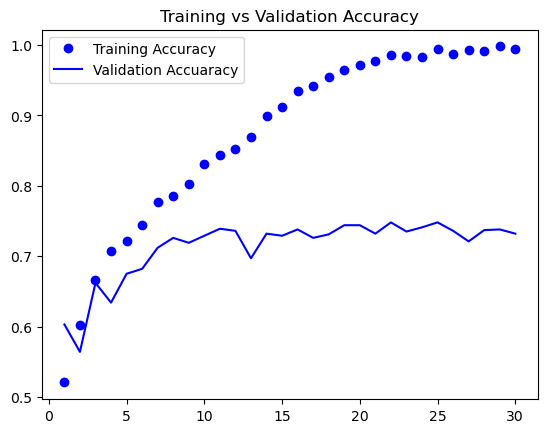

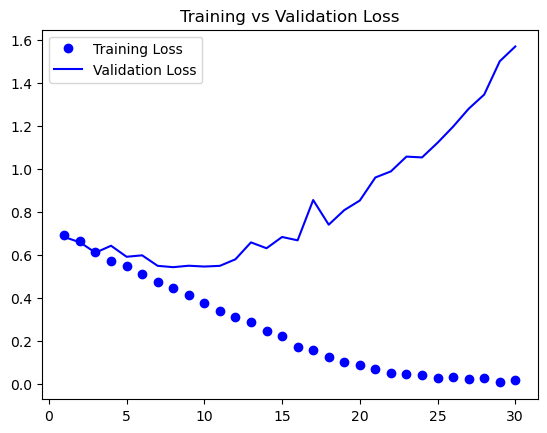

In [56]:
plot_metrics(history)


In [57]:
model.save('cats_dogs_small_1.h5')

In [58]:
file="C:/Users/jainh/OneDrive/Desktop/mlops_1,2/kaggle_original_data/cat.73.jpg"

In [65]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


1/1 [==============================] - 0s 106ms/step
DOG


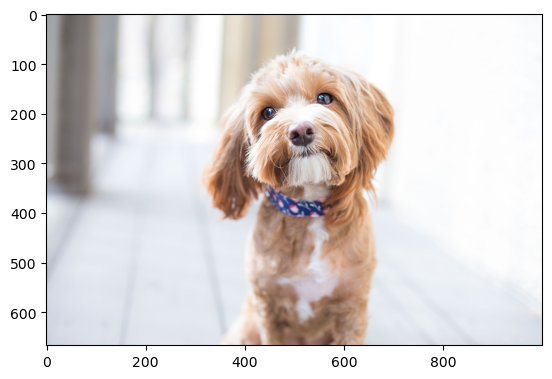

In [73]:
from PIL import Image
image=Image.open(file)
plt.imshow(image)
image=load_img(file, target_size=(150, 150))
image=img_to_array(image)
image=np.expand_dims(image, axis=0)
model='cats_dogs_small_1.h5'
model=load_model(model)
pred=int(model.predict(image)[0][0])
if pred==1:
    print("DOG")
else:
    print('CAT')

##### The model is cleaerly overfitting and needs to retrained with Data Augmentation

### Modelling with Data Augmentation